<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"></ul></div>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import style
%matplotlib inline
%config InlineBackend.figure_format = 'svg'
plt.style.use('seaborn')
from datetime import datetime
import time

In [2]:
X = np.array([[1, 1, 1, 1, 1, 1, 1, 1, 1, 1],     # для умножения на intercept
              [1, 1, 2, 1, 3, 0, 5, 10, 1, 2]]).T # стаж репетитора

y = [45, 55, 50, 59, 65, 35, 75, 80, 50, 60]      # средний балл ЕГЭ (целевая переменная)

**1 задание** 

*Проведите небольшое исследование алгоритма градиентного спуска. Оцените влияние значений скорости обучения $\eta$ и количества итераций на ошибку алгоритма. Как связаны эти два гиперпараметра между собой? Подберите скорость обучения и количество итераций до совпадения ответов алгоритма с результатами МНК. Как можно ускорить процесс вычисления весов?*
___________________________
___________________________

Для контроля - вот значения весов, найденные методом наименьших квадратов

In [3]:
least_squares_method = np.linalg.inv(X.T@X) @ X.T @ y
least_squares_method

array([47.23214286,  3.91071429])

значение $\eta$ напрямую влияет на скорость обучения. Ниже написана функция ```gradient_descent_function```, которая в цикле находит веса и возвращает информацию:
- количество пройденных итераций
- веса ```m``` и ```b``` для формулы ```y=mx+b```
- значение ```MSE```
- время исполнения скрипта
- ну и три графичка симпатичных строит - изменение значений ```m``` и ```b``` и ```MSE```


Поиск останавливается тогда, когда разница между $w$ и $w'$ меньше 1e-6

параметр ```eta_param``` необязательный. Если его не указать, функция отрабатывает с дефолтным значением $\eta$=1e-5

если же ```eta_param``` указать, то значение $\eta$ будет уменьшаться каждые 10 итераций

В результате без изменений $\eta$ скрипт отрабатывает за 13 секунд, а с итерационным уменьшением $\eta$ за 2 секунды. Это, конечно, тоже так себе результат, зато отлично показывает разницу в скорости алгоритма + количество итераций снижается в 6.5 раз

In [4]:
def gradient_descent_function(X, y, eta_param=False, task_3=False):
    start_time = datetime.now()
    n, w, eta = X.shape[0], np.array([1, 0.5]), 1e-5
    iter_, b_, m_, mse_list = [], [], [], []
    iter_count, step = 0, 1
    stop, mse = False, None

    
    while not stop:
        iter_count += 1
        if eta_param:
            if iter_count % 10 == 0:       # итерационно меняем learning rate
                eta = float(f'1e-{5-step}')
            
        if task_3:                         # условие для третьего задания
            eta = float(task_3)         
        
        y_pred = X @ w
        mse = np.mean((y - y_pred)**2)
#         for j in range(w.shape[0]):
#             w[j] -= eta * (1/n * 2 * np.sum(X[:,j] * (y_pred - y))) # можно и так
        DDD = w.copy()
        w -= eta * (1/n * 2 * X.T @ (y_pred - y))                    # но так быстрее

        iter_.append(iter_count)
        mse_list.append(mse)
        b_.append(w[0])
        m_.append(w[1])
        norm = np.linalg.norm(w - DDD, ord=2)
        if norm < 1e-6:
            stop = True
    # отрисовка трёх графиков
    fig, ax = plt.subplots(nrows=3)
    ax1, ax2, ax3 = ax.flatten()
    ax1.plot(iter_[::100], b_[::100], c='#267bd4', lw=4)
    ax1.set_title(f'eta = {eta}', fontweight='bold')
    ax1.text(np.array(iter_).mean(), np.array(b_).mean()-3, f'b = {round(w[0], 4)}', c='r')
    ax2.plot(iter_[::100], m_[::100], c='#7cd51b', lw=4)
    ax2.text(np.array(iter_).mean(), np.array(m_).mean(), f'm = {round(w[1], 4)}', c='r')
    ax3.plot(iter_[::100], mse_list[::100], c='#CD3AEA', lw=4)
    ax3.text(np.array(iter_).mean(), np.array(mse_list).mean()+200, f'MSE = {round(mse_list[-1], 4)}', c='r')
    fig.set_size_inches(12, 10)
    
    return print(f'для y=mx+b итераций: {iter_count}\nMSE Loss = {round(mse, 4)}\neta = {eta}\n'
                 f'время: {datetime.now()-start_time}\n\tb = {w[0]}\n\tm = {w[1]}')

пример без корректировки $\eta$

для y=mx+b итераций: 590968
MSE Loss = 45.9423
eta = 1e-05
время: 0:00:27.523303
	b = 47.13756874829995
	m = 3.928178118377895


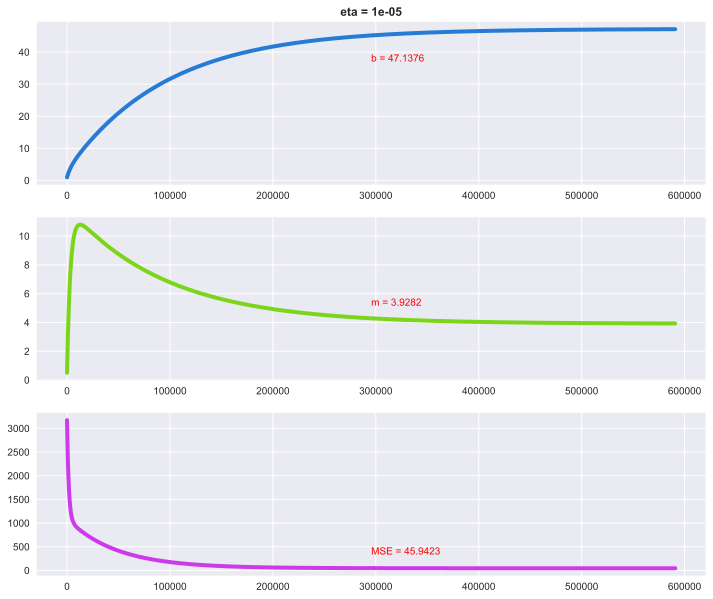

In [5]:
gradient_descent_function(X, y)

и пример с корректировкой $\eta$

для y=mx+b итераций: 81247
MSE Loss = 45.9375
eta = 0.0001
время: 0:00:03.513736
	b = 47.22268652344574
	m = 3.9124604700697905


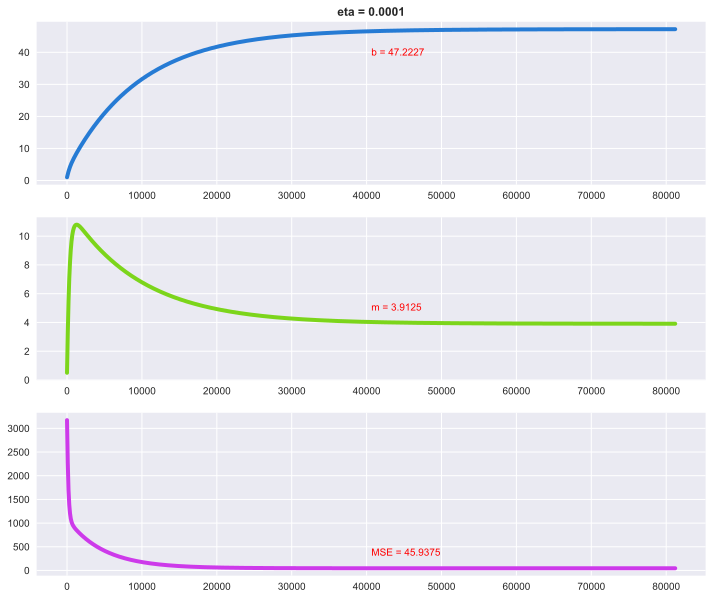

In [6]:
gradient_descent_function(X, y, eta_param=True)

**P.S.:** если скорость обучения сделать слишком большой алгоритм "улетит", зациклится и значение ошибки будет только расти

**2 задание\***

В этом коде мы избавляемся от итераций по весам, но тут есть ошибка, исправьте ее:*

___________________________
___________________________

в исправленном варианте нет цикла по весам за счёт того, что используем скалярное произведение $w$ и $X^T$

In [7]:
w = np.array([1, 0.5])
iterations = 1001
eta = 1e-3
n = len(X)

for i in range(iterations):
    y_pred = w@X.T
    err = np.mean((y - y_pred)**2)
    w -= eta * (1/n * 2 * np.dot(X.T, (y_pred - y))) # ошибка была здесь
    if i % 100 == 0:
        print(i, w, err) # [47.23214286  3.91071429] 45.937499999999986

0 [1.1102 0.84  ] 3173.15
100 [ 7.43515582 10.71754582] 899.5990444359252
200 [11.44993589 10.49282195] 735.5540619653668
300 [14.98921624  9.8634316 ] 606.0048772266812
400 [18.17511588  9.27626113] 500.7989288428639
500 [21.04606457  8.74617136] 415.355423398327
600 [23.63334499  8.26841272] 345.9620646005472
700 [25.96499229  7.83785632] 289.6039104863001
800 [28.06626432  7.44984037] 243.83236130353217
900 [29.95992301  7.10016181] 206.65877484533297
1000 [31.66648131  6.78503276] 176.46806566379882


**3 задание\***

Вместо того, чтобы задавать количество итераций, задайте условие остановки алгоритма - когда ошибка за итерацию начинает изменяться ниже определенного порога. Сколько нужно сделать итераций, если установить допустимое отклонение mse в размере diff=1e-6, а значение eta=1e-2?*

___________________________
___________________________

условие остановки аггоритма я прописал в функции к первому заданию, а к этому добавил в функцию ещё один параметр "task_3"

если в нём строкой указать значение $\eta$, таким оно и будет. Проверим:

Для $\eta=$1e-6 - устанем ждать

для y=mx+b итераций: 3695207
MSE Loss = 46.4184
eta = 1e-06
время: 0:02:41.073777
	b = 46.28639223365487
	m = 4.085354373071995


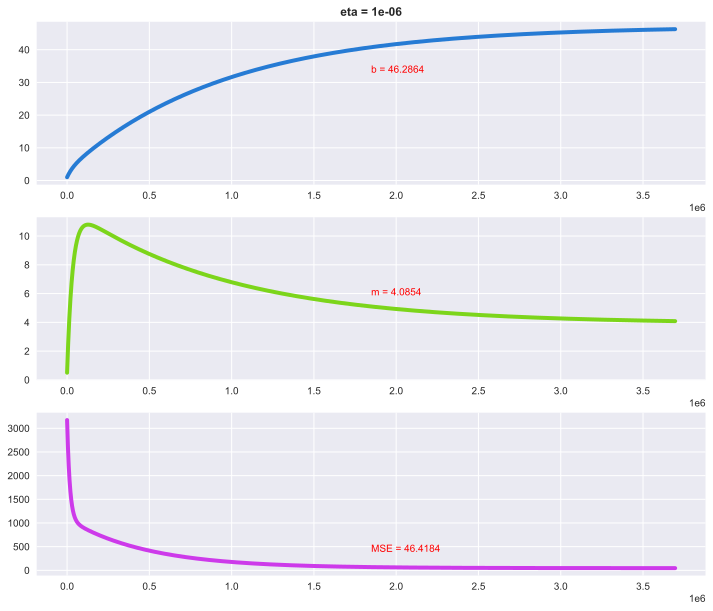

In [8]:
gradient_descent_function(X, y, task_3='1e-6')

Зато при $\eta=$1e-2 всё шустро

для y=mx+b итераций: 1250
MSE Loss = 45.9375
eta = 0.01
время: 0:00:00.100641
	b = 47.23204948032864
	m = 3.9107315284573376


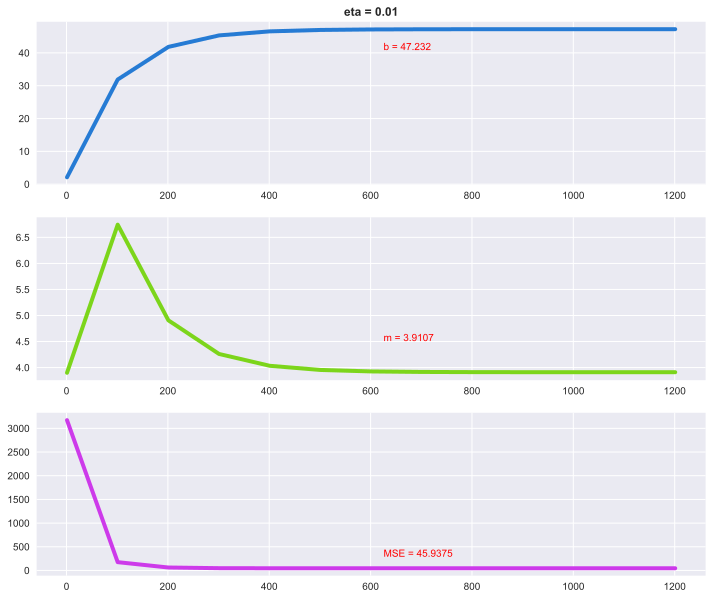

In [9]:
gradient_descent_function(X, y, task_3='1e-2')

**P.S.:** по графику видно, что веса при  𝜂=1e-6 корректируются мееедленно, а снизив $\eta$ мы снизили и скорость обучения. 

При меньшей скорости обучения мало того, что алгоритм работает кратно быстрее и делает гораздо меньше итераций, так он ещё и точнее находит веса - найденные веса максимально приближены к тем значениям, которые находятся методом наименьших квадратов, напомним их себе:

In [10]:
least_squares_method

array([47.23214286,  3.91071429])